In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
dataset = pd.read_csv("C:/Users/ANITHA/Desktop/Project/Employee_Cpa/Data Sets/result.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                65 non-null     int64 
 1   Age                       65 non-null     int64 
 2   Attrition                 65 non-null     object
 3   BusinessTravel            65 non-null     object
 4   DailyRate                 65 non-null     int64 
 5   Department                65 non-null     object
 6   DistanceFromHome          65 non-null     int64 
 7   Education                 65 non-null     int64 
 8   EducationField            65 non-null     object
 9   EmployeeCount             65 non-null     int64 
 10  EmployeeNumber            65 non-null     int64 
 11  EnvironmentSatisfaction   65 non-null     int64 
 12  Gender                    65 non-null     object
 13  HourlyRate                65 non-null     int64 
 14  JobInvolvement            65

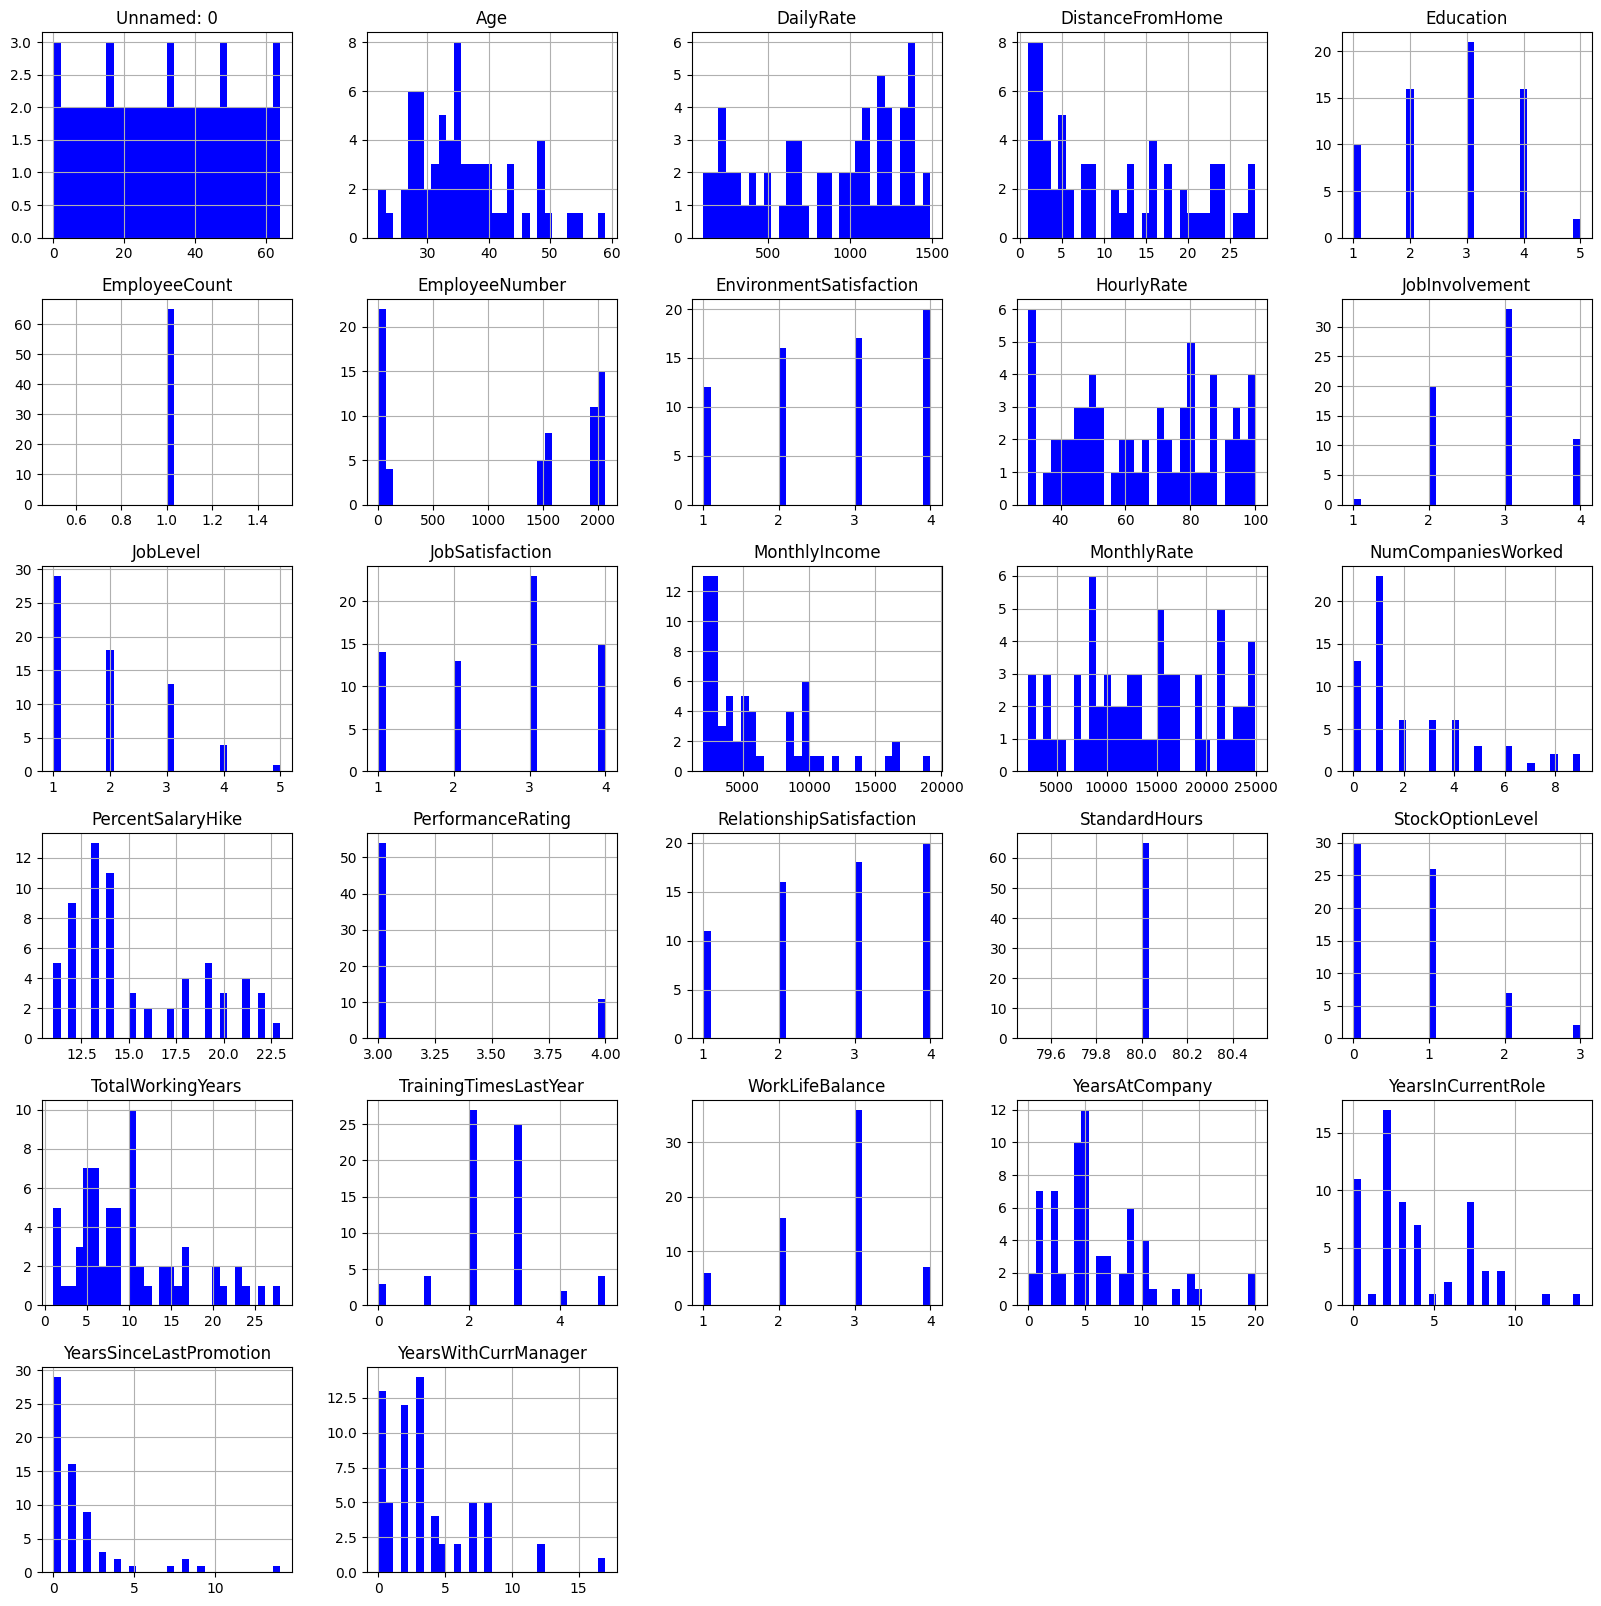

In [3]:
dataset.hist(bins = 30, figsize = (20,20), color = 'b')
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/freqyuency.png')

In [4]:
dataset['Attrition_ind'] = 0
dataset.loc[dataset['Attrition'] == 'leave', 'Attrition_ind'] = 1
dataset.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Name,Attrition_ind
0,0,41,leave,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,0,8,0,1,6,4,0,5,a,1
1,1,49,stay,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,1,10,3,3,10,7,1,7,b,0
2,2,37,leave,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,0,7,3,3,0,0,0,0,c,1
3,3,33,stay,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,0,8,3,3,8,7,3,0,d,0
4,4,27,stay,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,1,6,3,3,2,2,2,2,e,0


In [5]:
data_main = dataset.drop(['EmployeeCount', 'Over18', 'StandardHours','Name','Unnamed: 0'], axis=1)
data_main.head()
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_ind'],
      dtype='object')

In [6]:
data_main['Attrition']=data_main['Attrition_ind']
data_main.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_ind
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,0,8,0,1,6,4,0,5,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,1,10,3,3,10,7,1,7,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,0,7,3,3,0,0,0,0,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,0,8,3,3,8,7,3,0,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,1,6,3,3,2,2,2,2,0


In [7]:
data_main=data_main.drop(['Attrition_ind'],axis=1)
data_main.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [8]:
gender_dict = data_main["Gender"].value_counts()
gender_dict

Male      45
Female    20
Name: Gender, dtype: int64

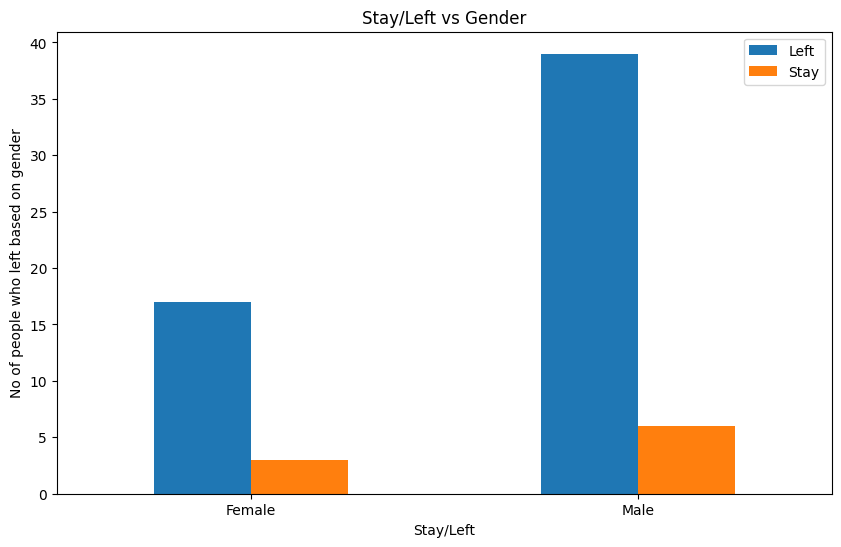

In [9]:
pd.crosstab(data_main['Gender'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/genderVSAttrition.png')

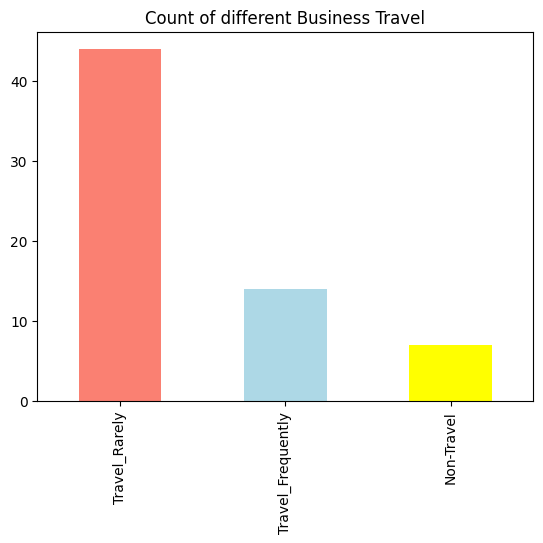

In [10]:
data_main['BusinessTravel'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Business Travel")
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/typesofbusinessTravel.png')

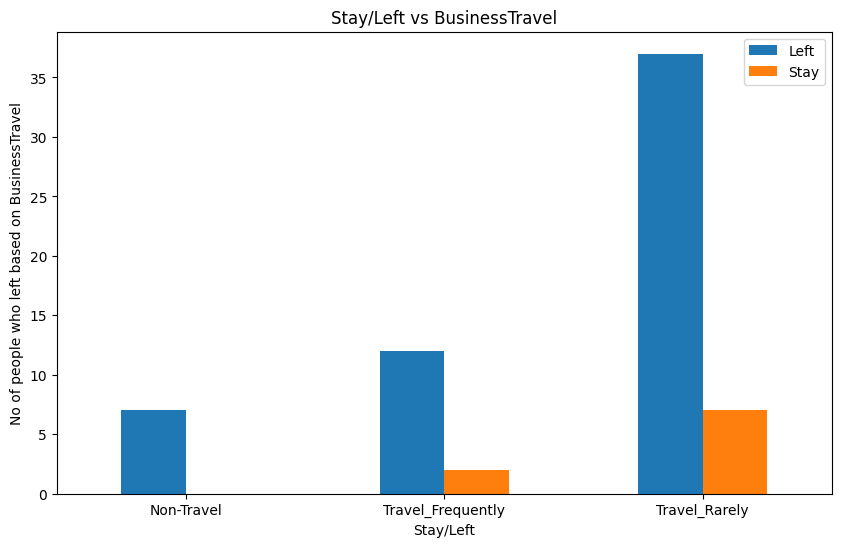

In [11]:
pd.crosstab(data_main['BusinessTravel'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs BusinessTravel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on BusinessTravel")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/BuisnessTravelVSAttrition.png')

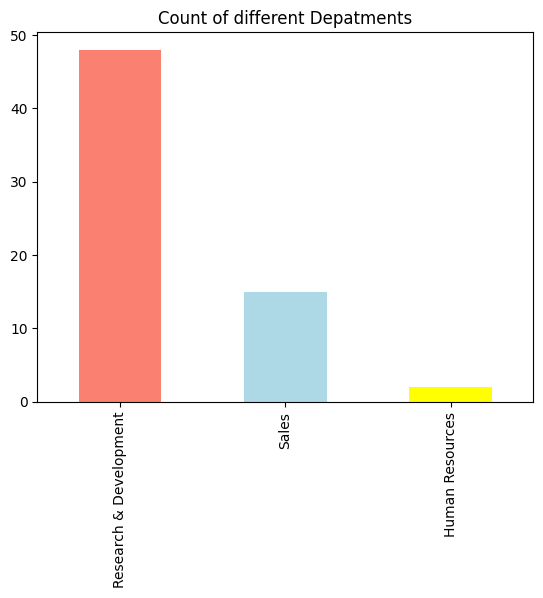

In [12]:
data_main['Department'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Depatments")
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/typesofdepartments.png')

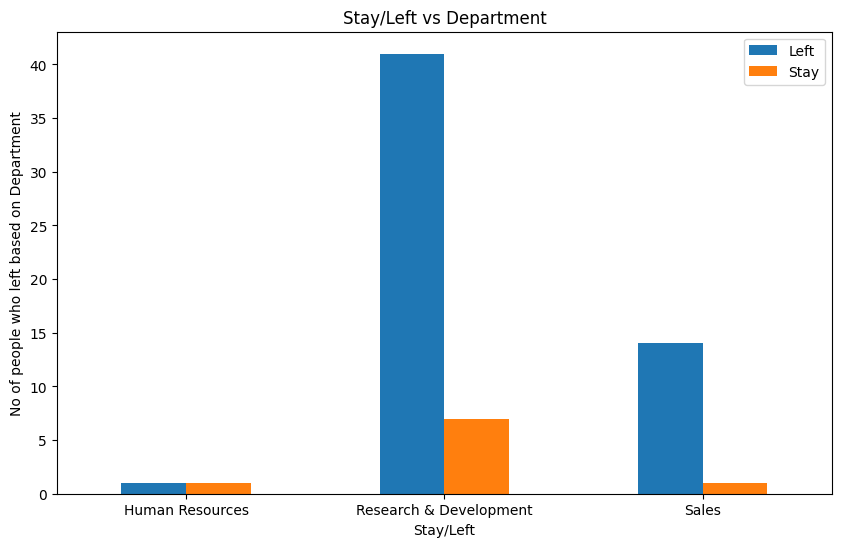

In [13]:
pd.crosstab(data_main['Department'],data_main['Attrition']).plot(kind="bar",figsize=(10,6))
plt.title("Stay/Left vs Department")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Department")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/DepartmentsVSAttrition.png')

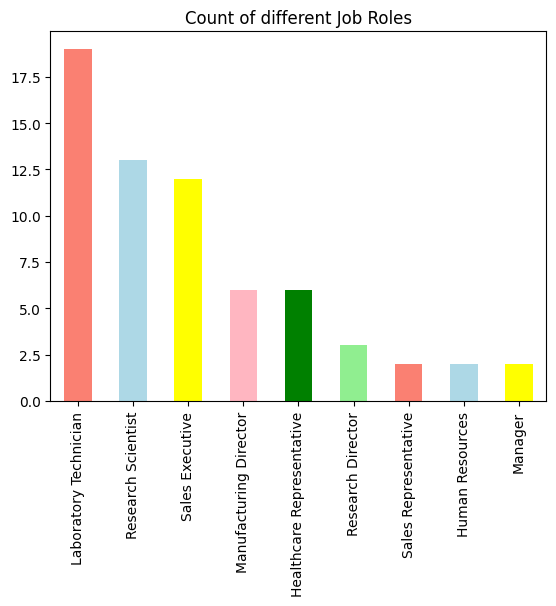

In [14]:
data_main['JobRole'].value_counts().plot(kind='bar',color=['salmon','lightblue','yellow', 'lightpink', 'green', 'lightgreen'],title="Count of different Job Roles")
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/JobRole.png')

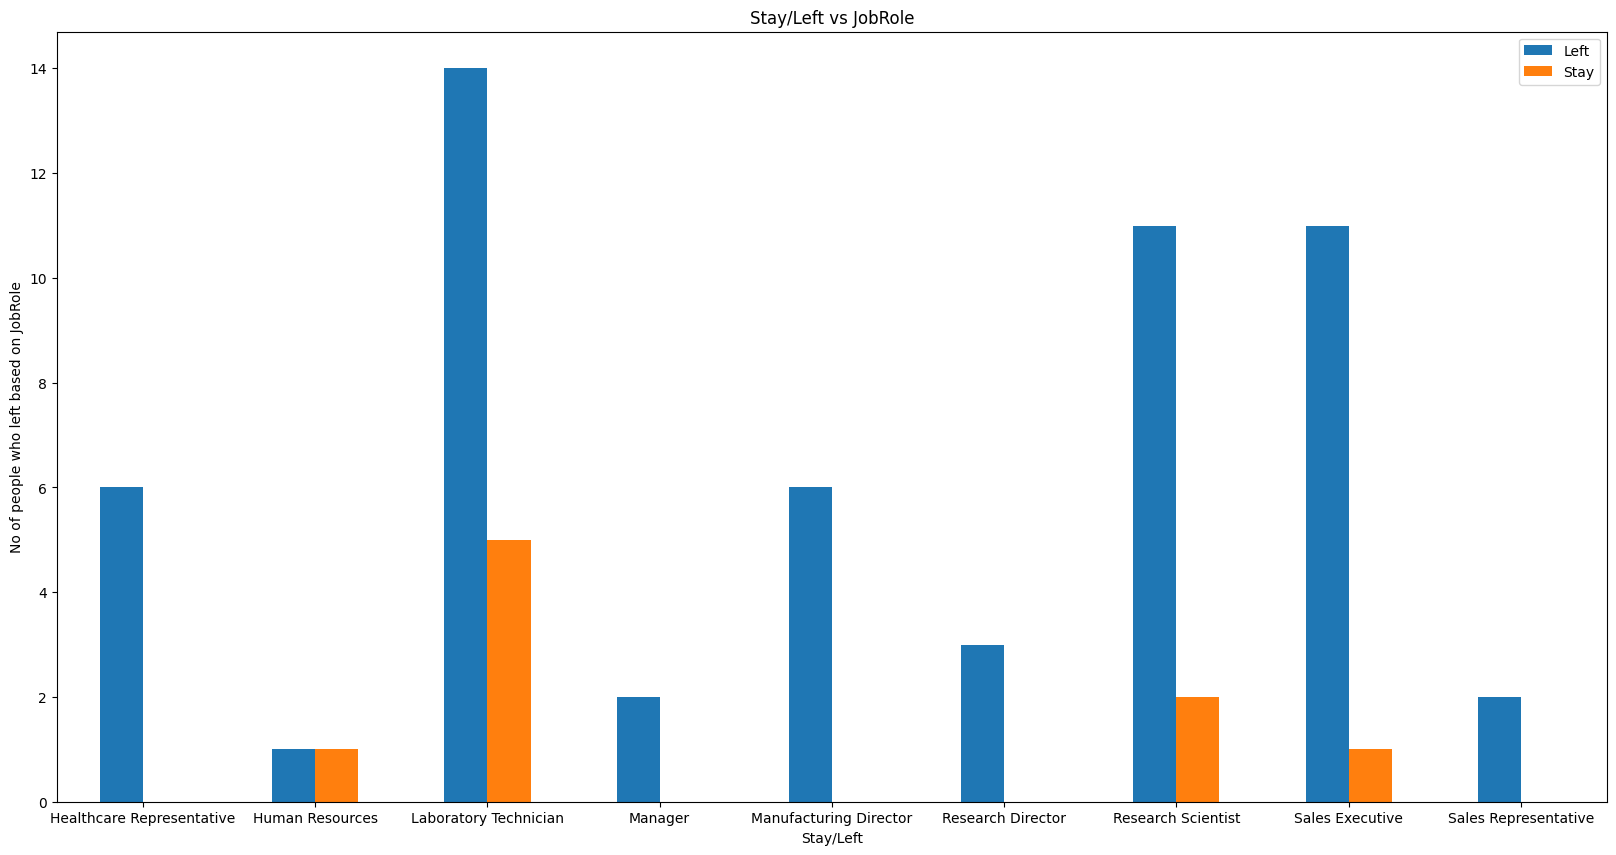

In [15]:
pd.crosstab(data_main['JobRole'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs JobRole")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on JobRole")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/JobRole2VSAttrition.png')

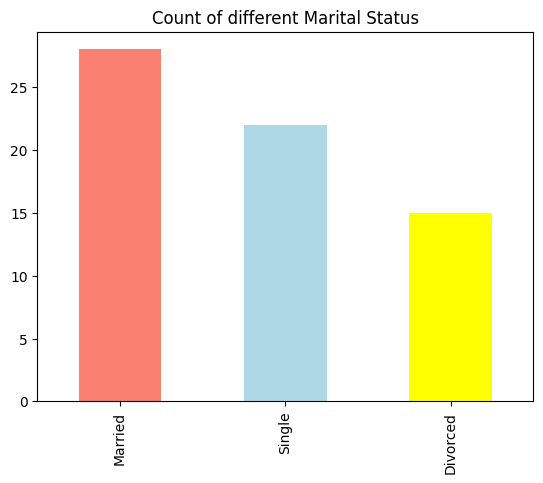

In [16]:
data_main['MaritalStatus'].value_counts().plot(kind='bar',color=['salmon','lightblue', 'yellow'],title="Count of different Marital Status")
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/countmar.png')

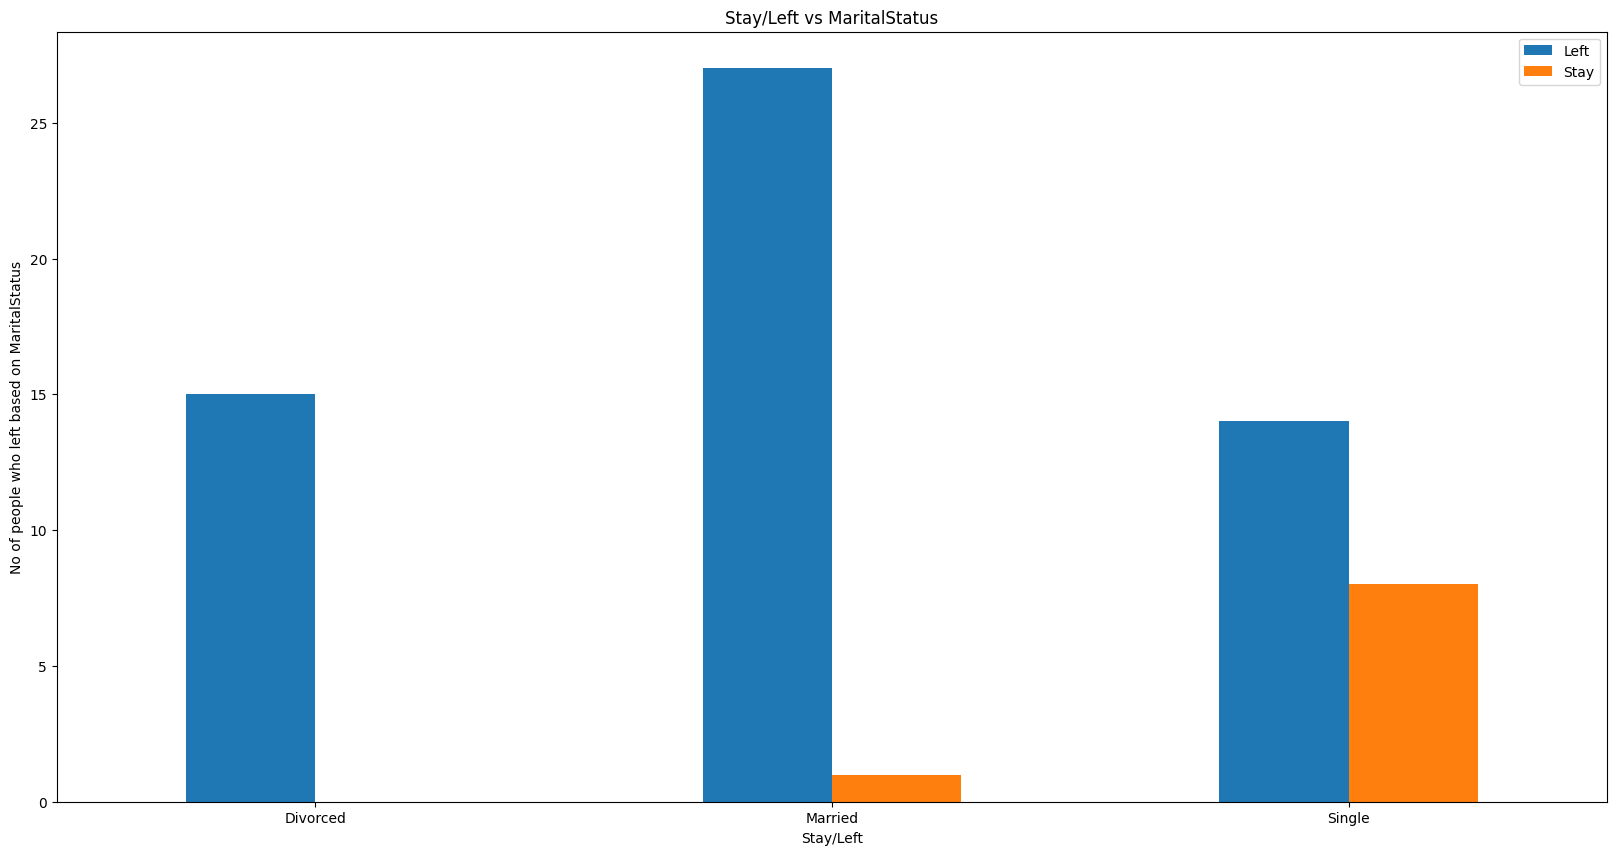

In [17]:
#Create a plot for crosstab

pd.crosstab(data_main['MaritalStatus'],data_main['Attrition']).plot(kind="bar",figsize=(20,10))
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on MaritalStatus")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/marstatVSAttrition.png')

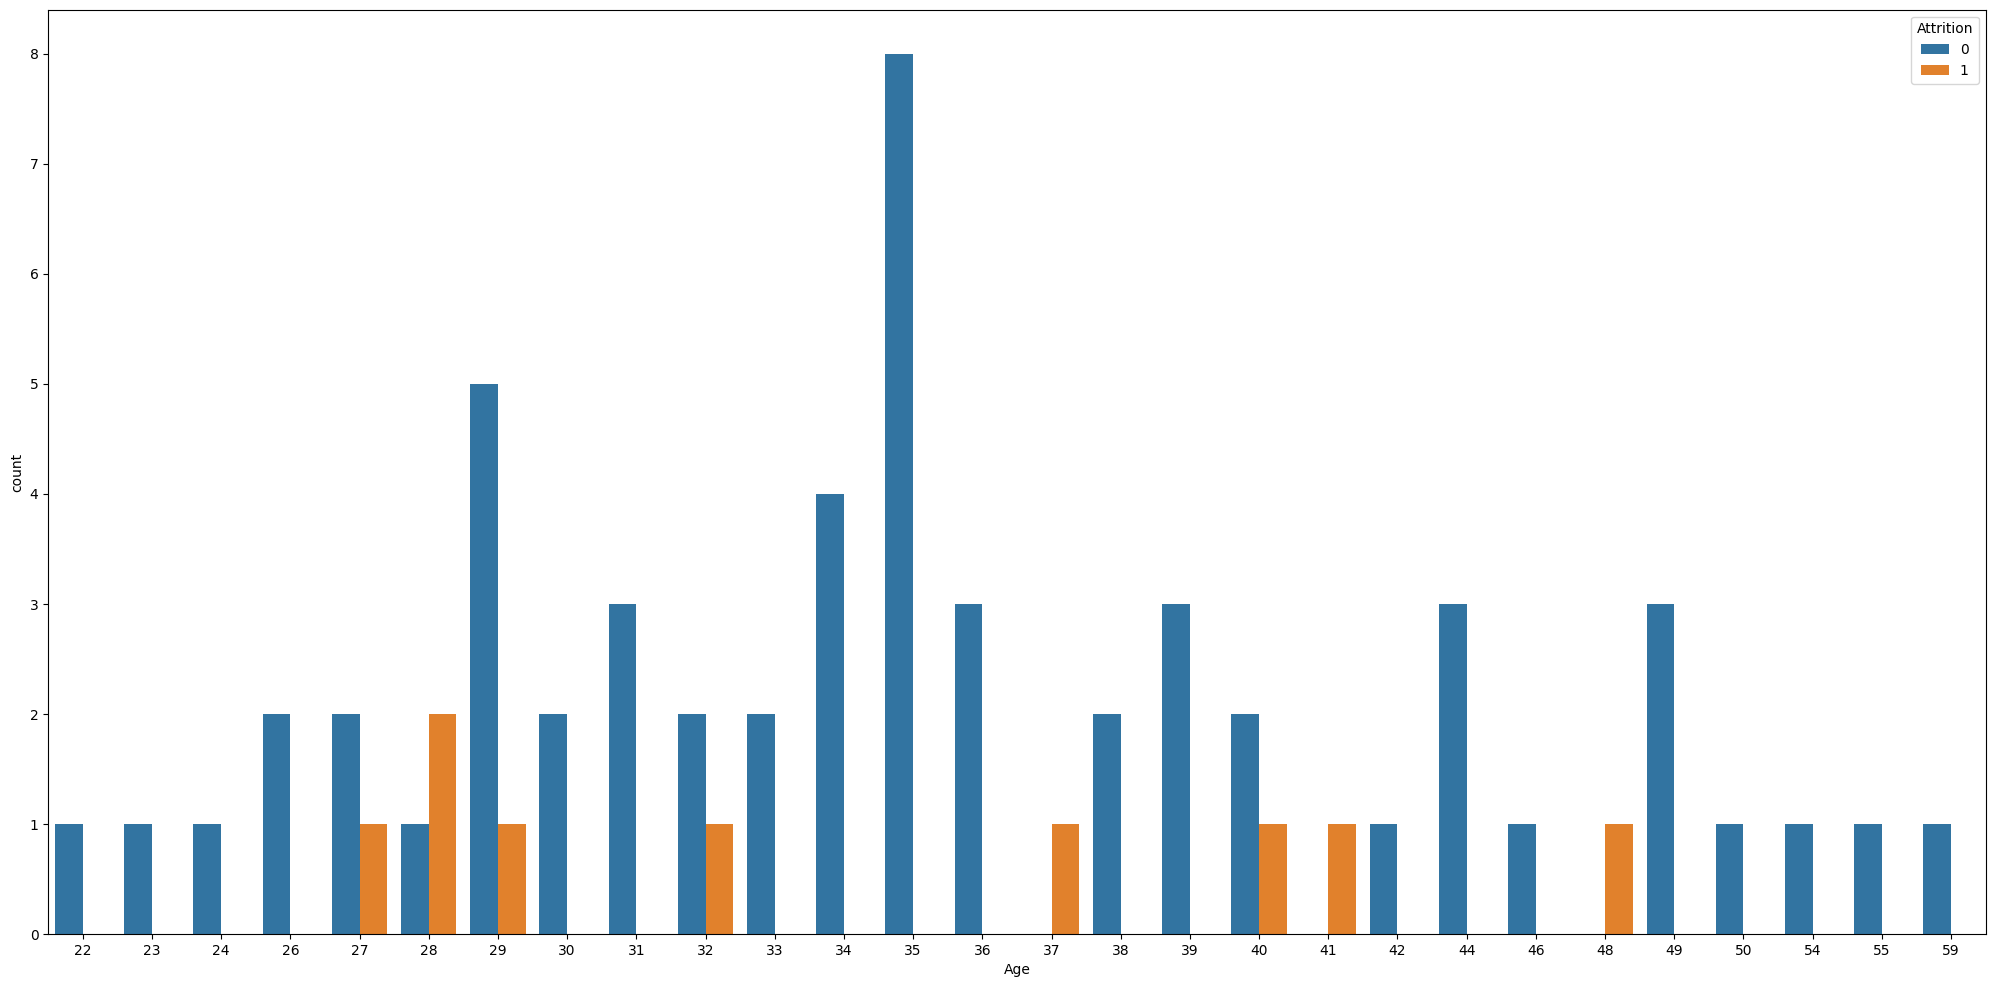

In [18]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/AgeVSAttrition.png')

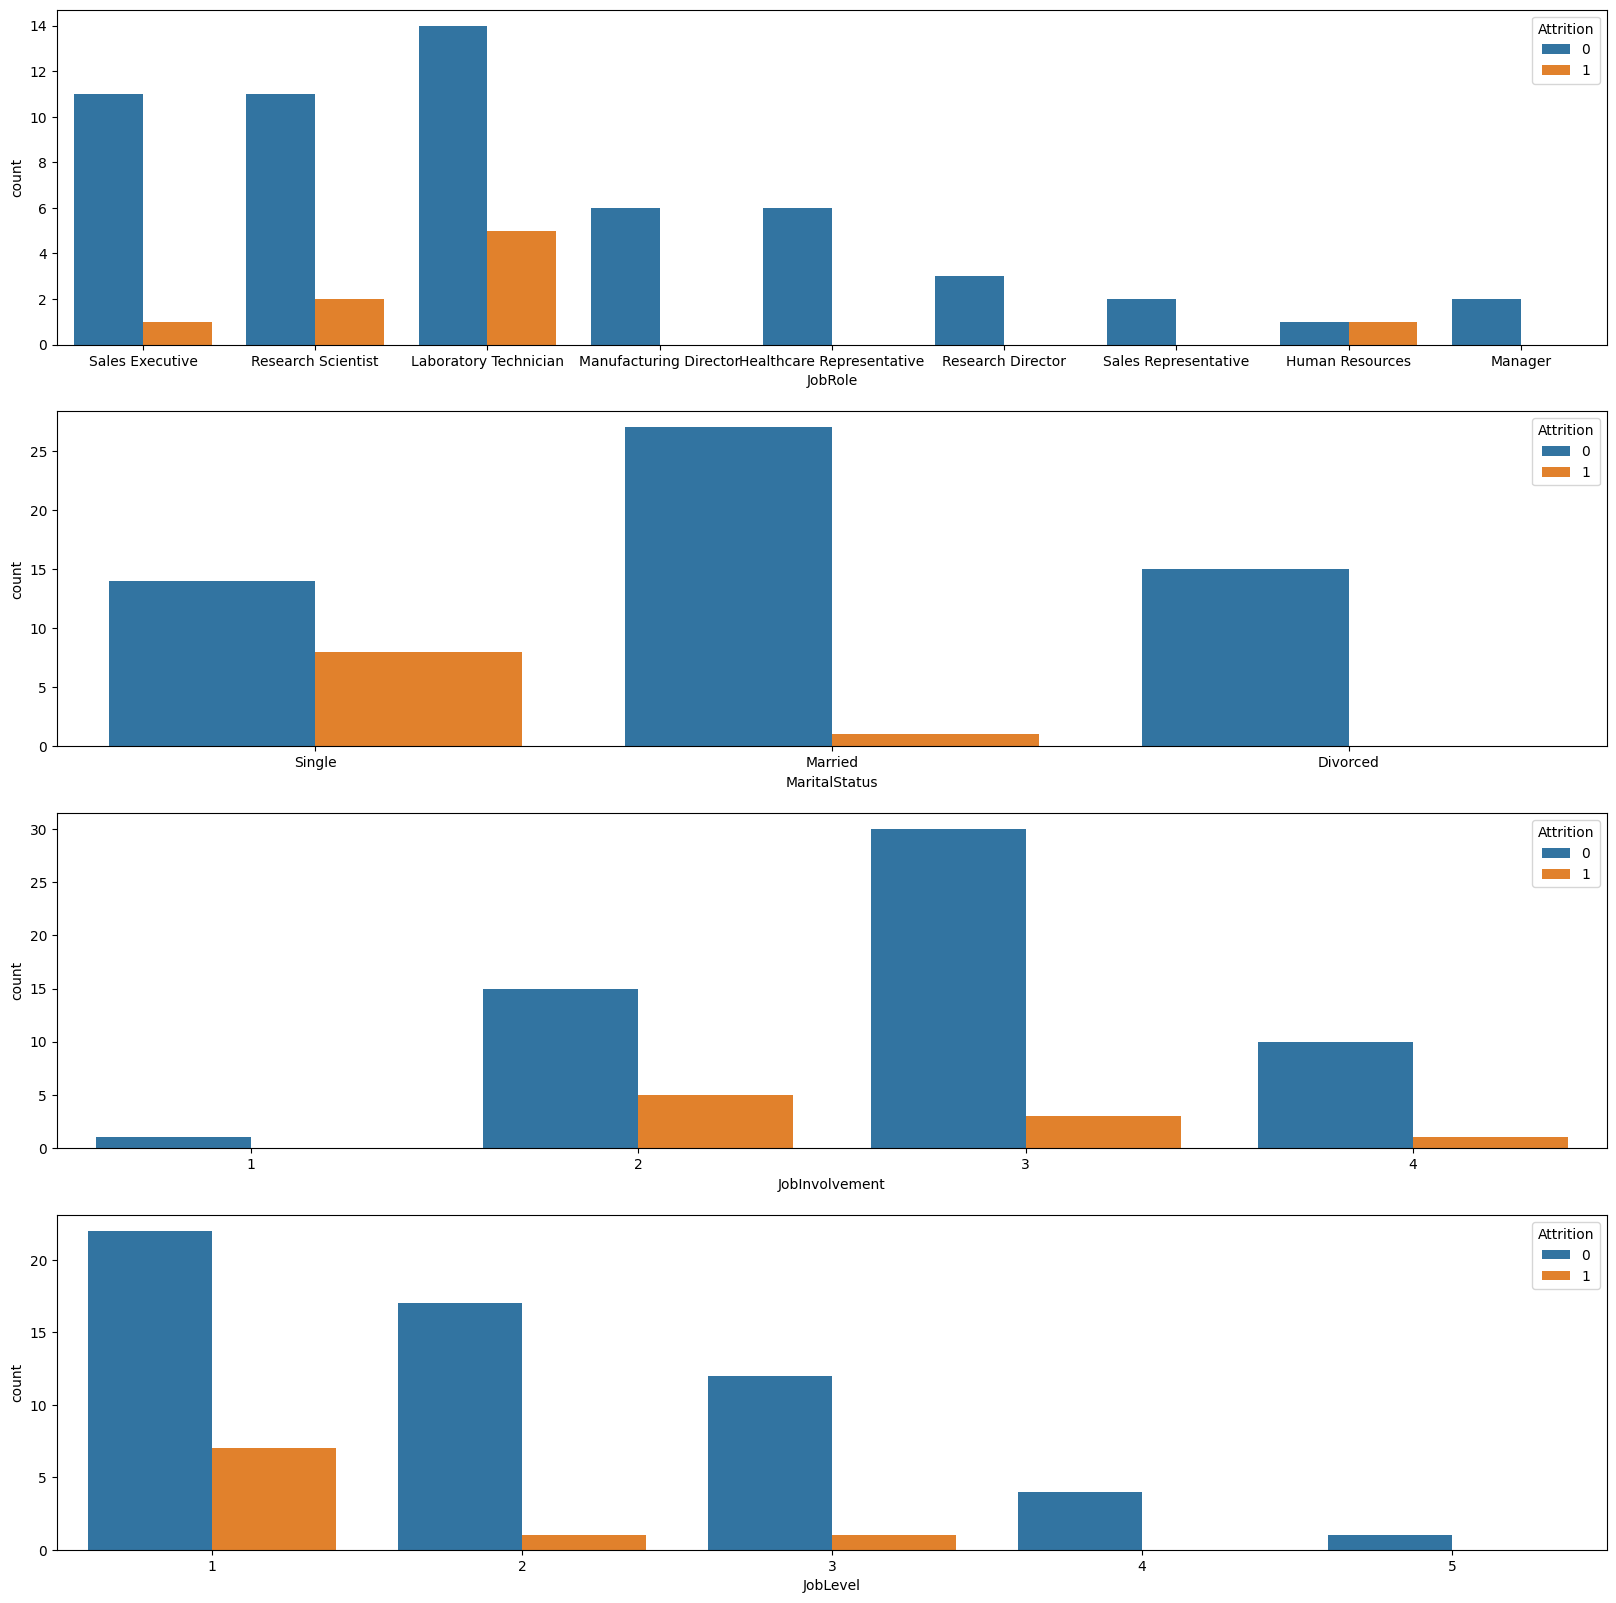

In [19]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/JobRoleVSAttrition.png')
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/MaritalStatusVSAttrition.png')
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/JobInvolvementVSAttrition.png')
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/JobLevelVSAttrition.png')

In [20]:
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == 'leave' else 0)
left_df        = dataset[dataset['Attrition'] == 1]
stayed_df      = dataset[dataset['Attrition'] == 0]

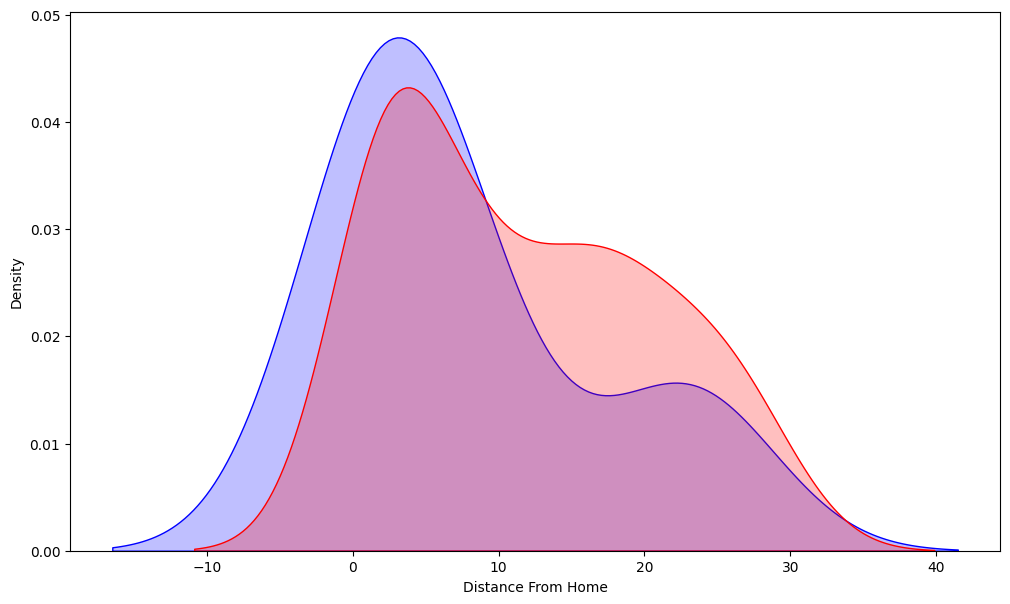

In [21]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Distance From Home')
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/distance from home.png')

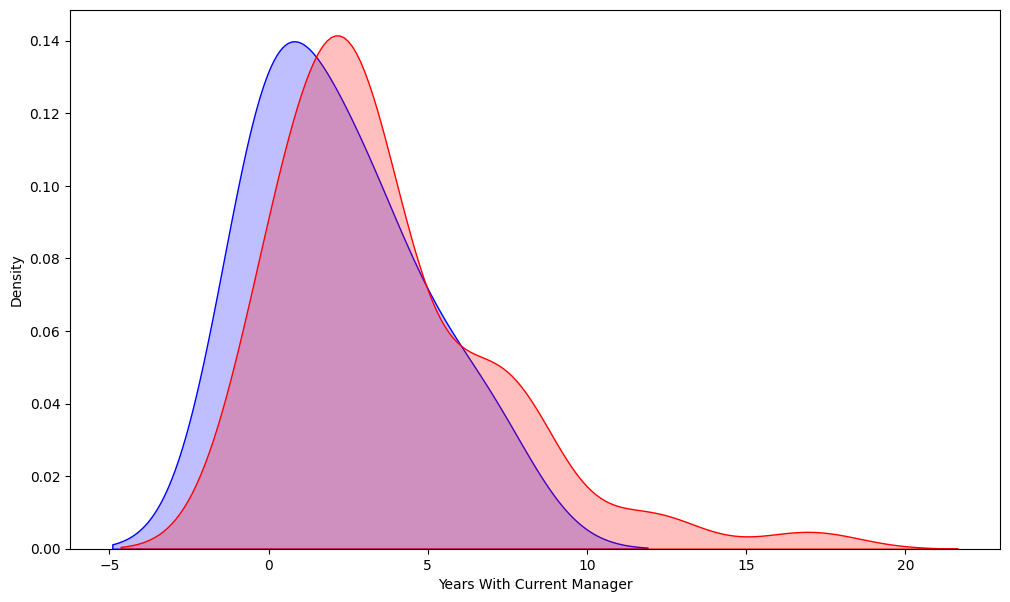

In [22]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', fill = True, color = 'b')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', fill = True, color = 'r')

plt.xlabel('Years With Current Manager')
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/Yearwithcurrman.png')

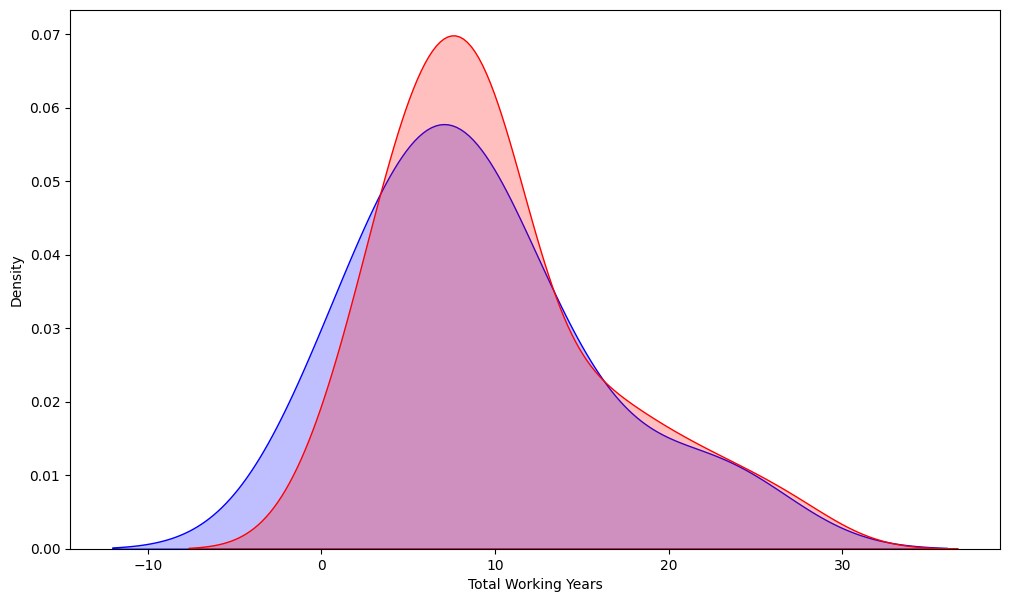

In [23]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], fill = True, label = 'Employees who left', color = 'b')
sns.kdeplot(stayed_df['TotalWorkingYears'], fill = True, label = 'Employees who Stayed', color = 'r')

plt.xlabel('Total Working Years')
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/totalworkingyears.png')

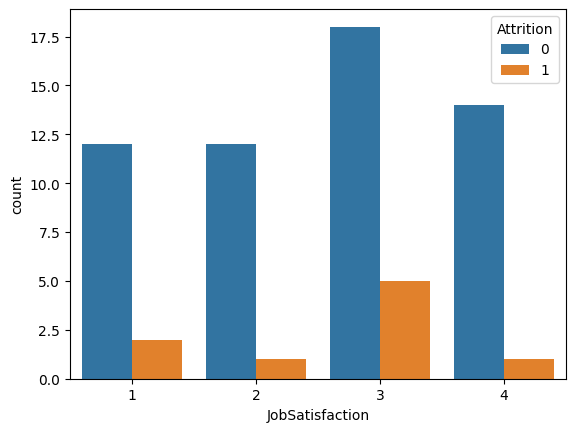

In [24]:
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/jobsatisfaction.png')

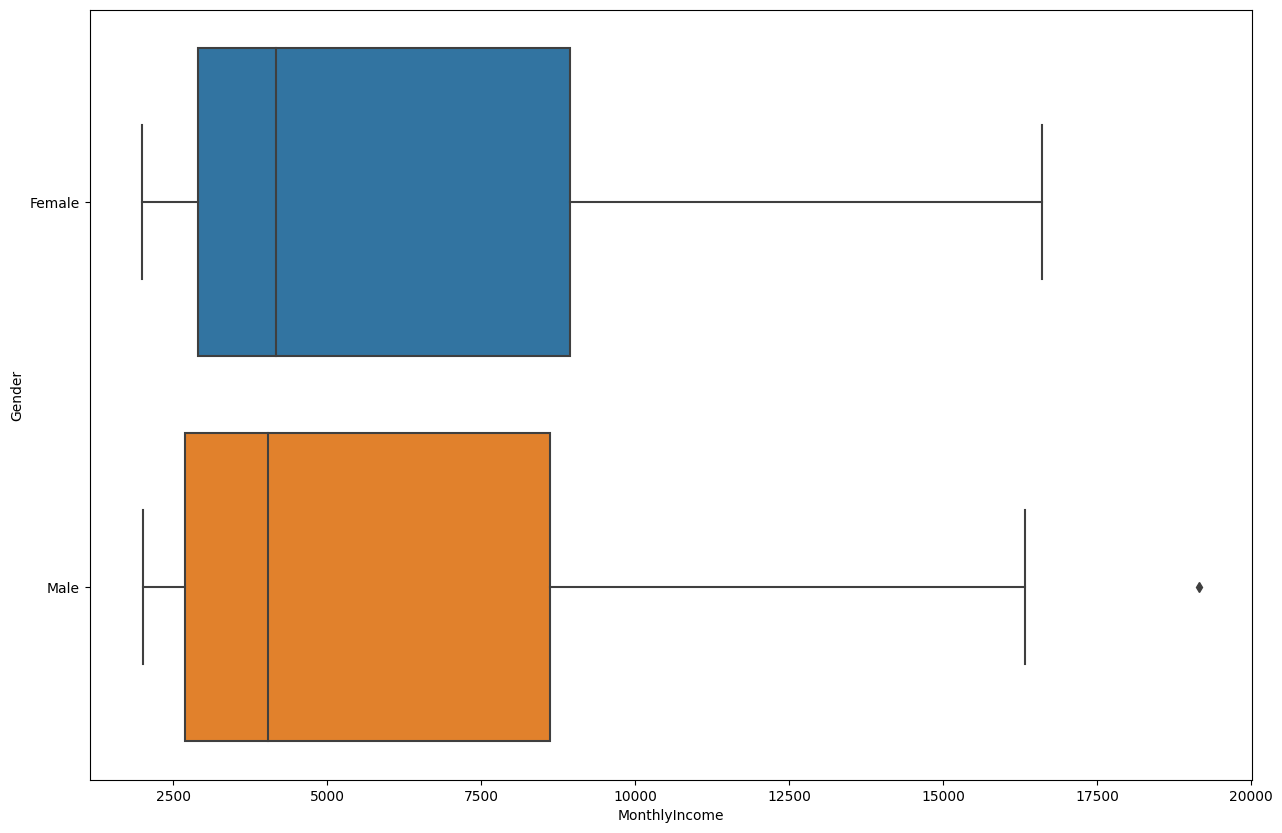

In [25]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/genderVSmonthlyincome.png')

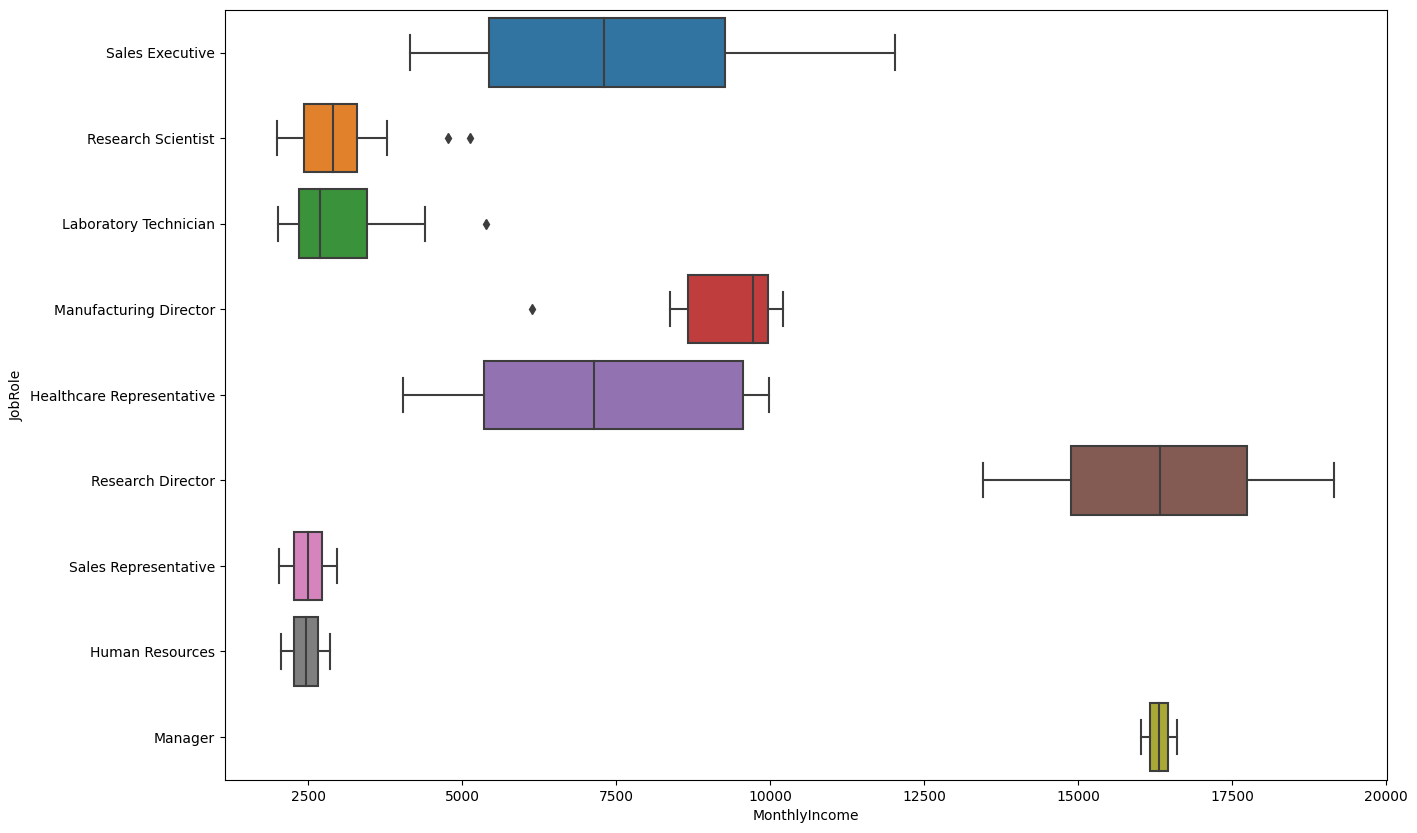

In [26]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/jobroleVSmonthlyincome.png')

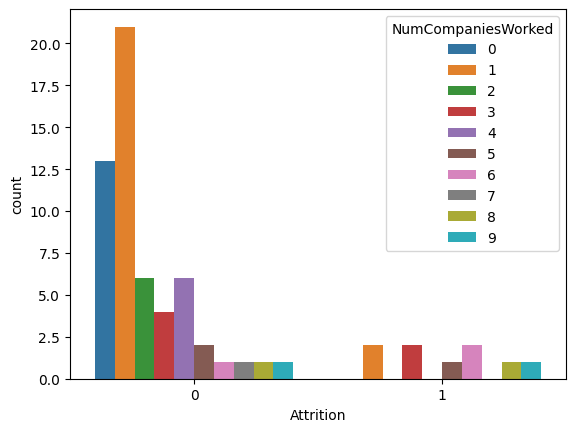

In [27]:
sns.countplot(x = 'Attrition',hue='NumCompaniesWorked',data=data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/numofcompaniesworked.png')

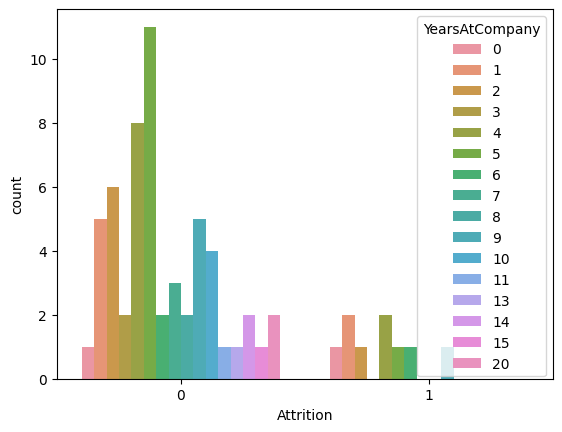

In [28]:
sns.countplot(x = 'Attrition',hue='YearsAtCompany',data=data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/Yearsatcompany.png')

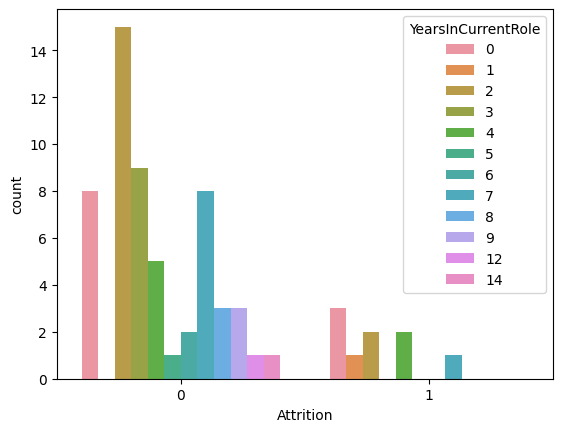

In [29]:
sns.countplot(x = 'Attrition',hue='YearsInCurrentRole',data=data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/Yearsincurrentrole.png')

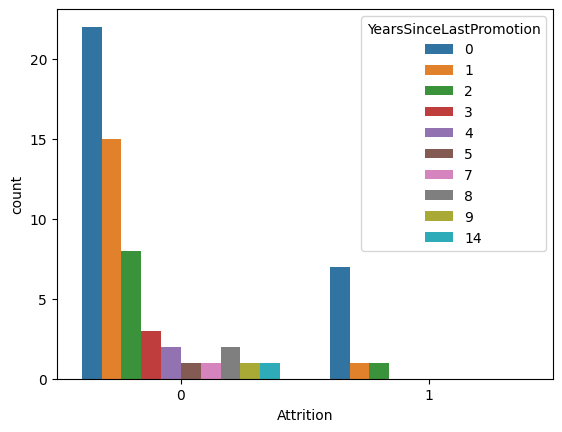

In [30]:
from tkinter.filedialog import SaveAs


sns.countplot(x = 'Attrition',hue='YearsSinceLastPromotion',data=data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/YearsSinceLastPromotion.png')

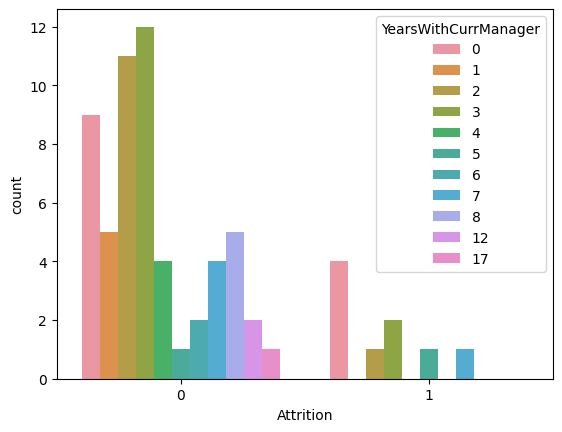

In [31]:
sns.countplot(x = 'Attrition',hue='YearsWithCurrManager',data=data_main)
plt.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/YearsWithCurrentManger.png')

C:\Users\ANITHA\AppData\Local\Temp\ipykernel_42192\951059610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=data_main.corr()


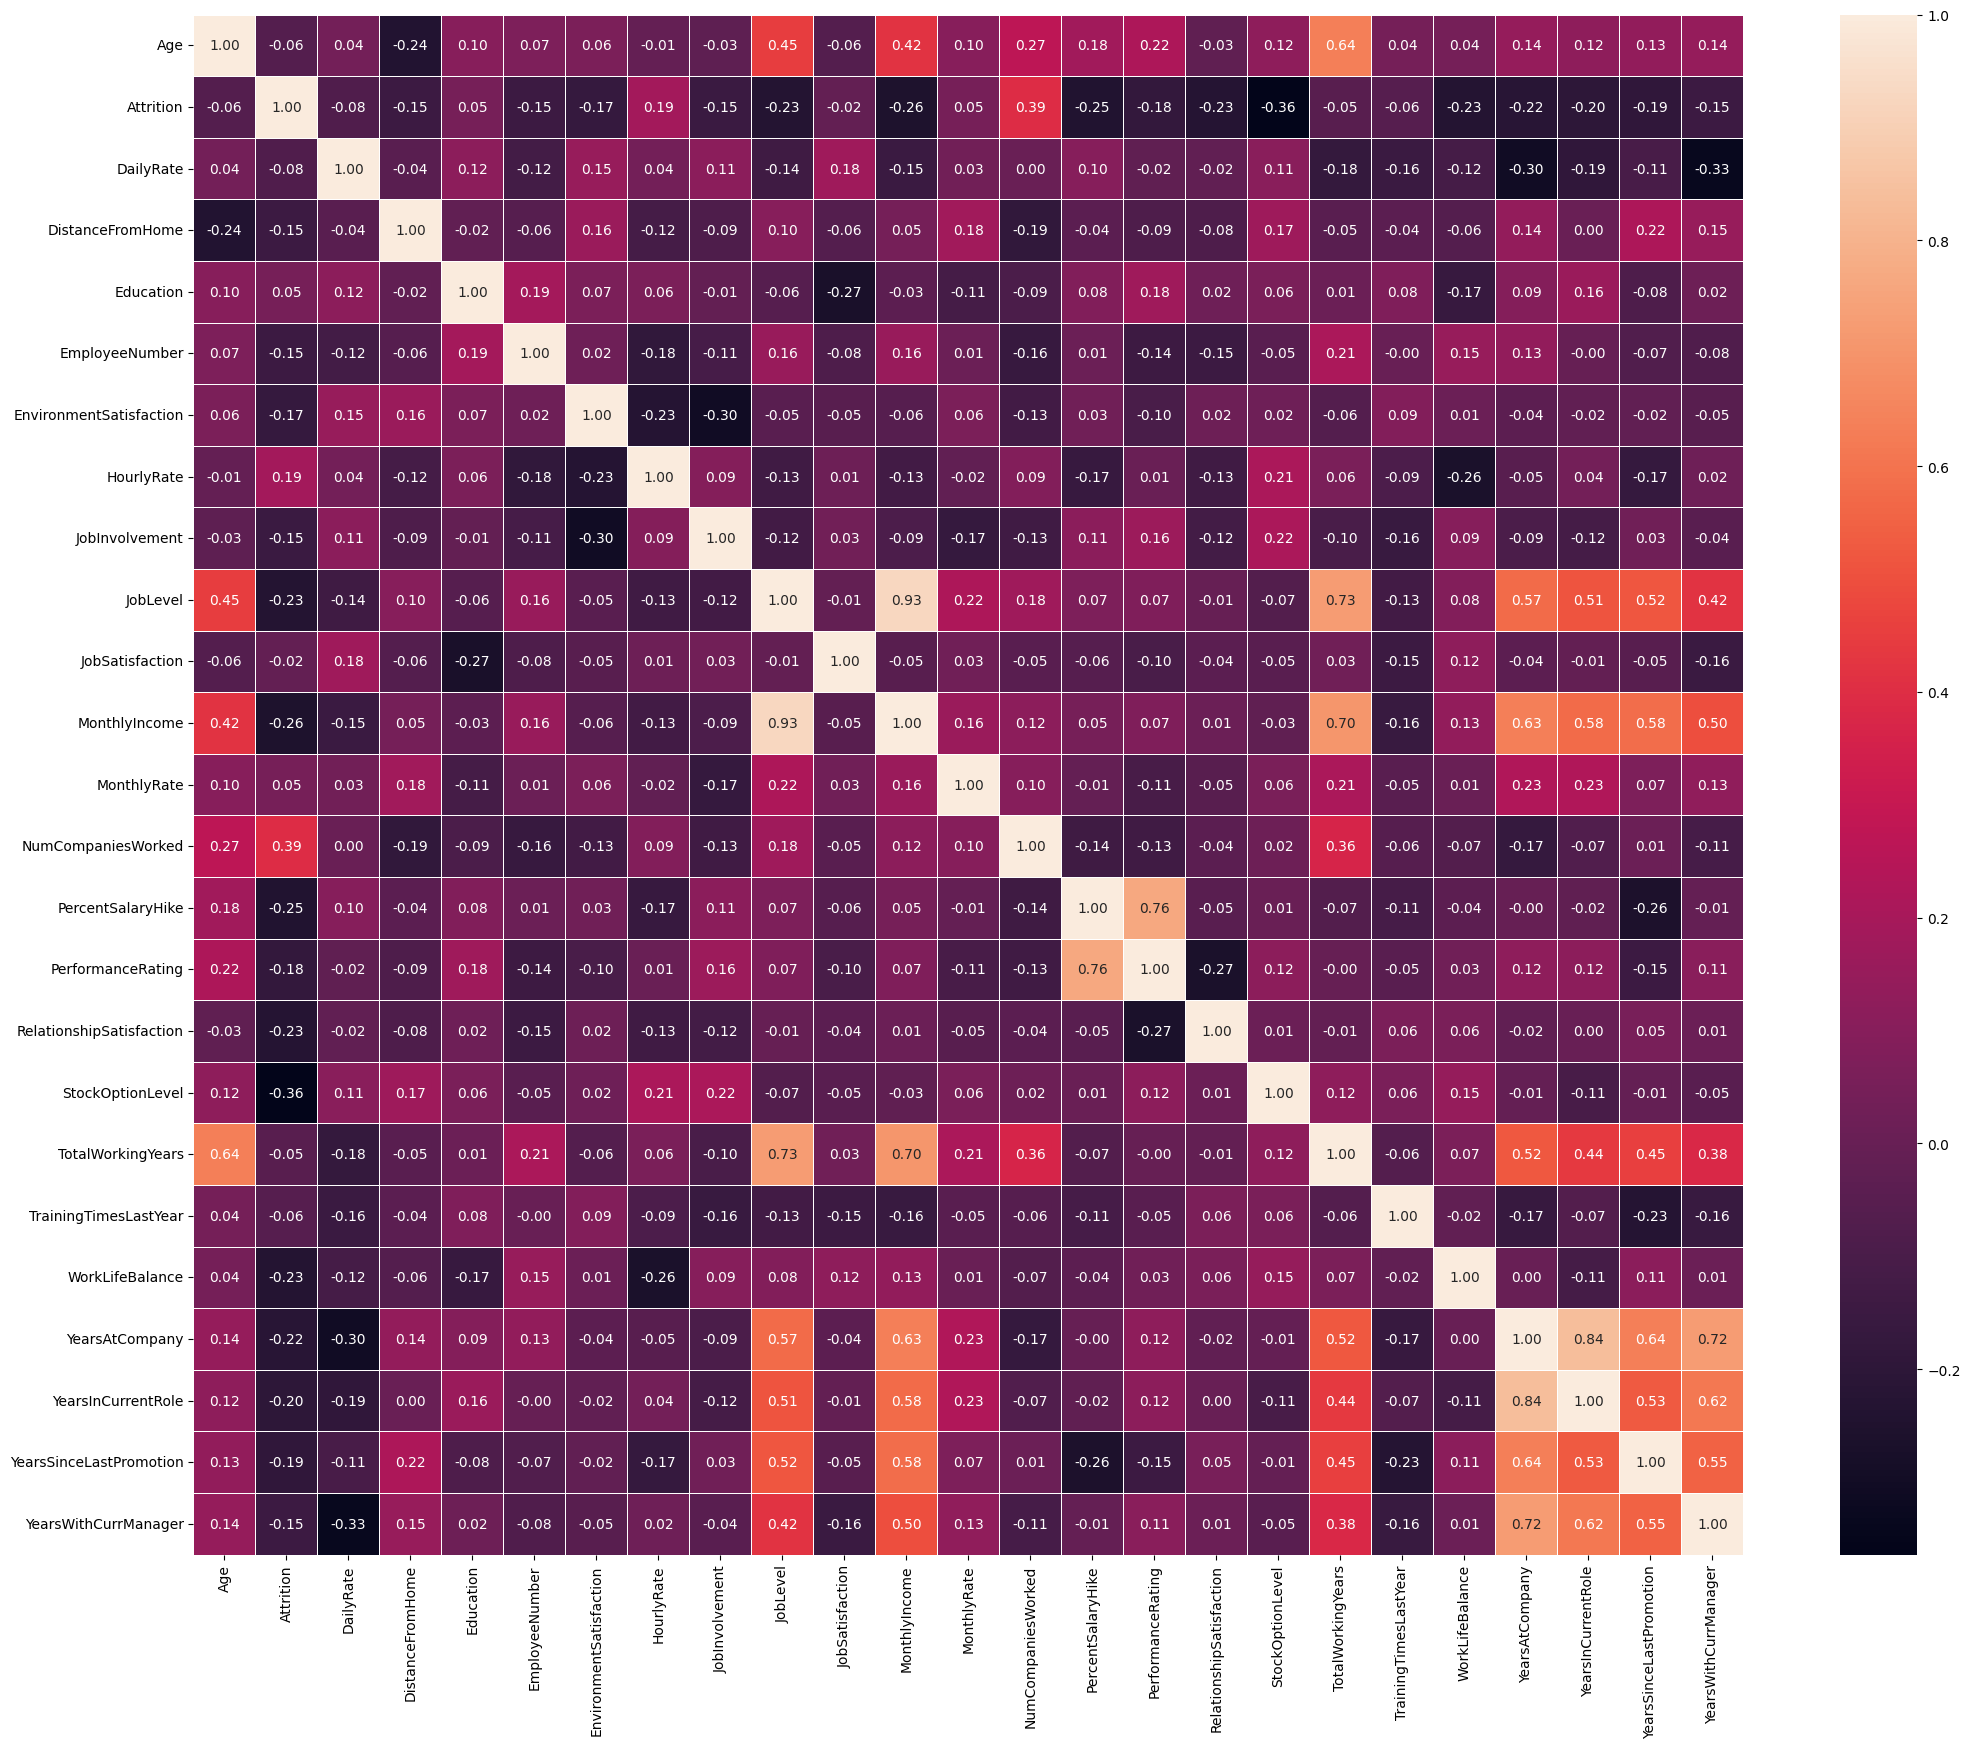

In [32]:
corr_matrix=data_main.corr()
fig,ax=plt.subplots(figsize=(25,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )
fig.savefig('C:/Users/ANITHA/Desktop/Project/Employee_Cpa/static/images/correlationmatrix.png')
